In [1]:
#1. Entendendo os dados Iris 
#2. Explorando os dados 
#3. Analisando os dados 
#3.1 Qual tipo de Iris com a maior  e menor pétala? 
#3.2 Qual tipo de Iris apresenta a maior  e menor sépala? 
#3.3 Quais fatores influenciam no crescimento da pétala? 
#4. Criando um modelo para classificar os tipos de Iris, a partir de Machine Learning suas características. 
#4.1 Avaliar o modelo através de uma matriz de concussão. 
#4.2 Qual a taxa de acerto do modelo? 
Importando os dados...
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix
sns.set_theme()



In [2]:
#Item 2. Abrindo o arquivo
df = pd.read_csv("IRIS.csv")


In [3]:
#Item 2. Informações do data
df.info
        

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [4]:
#Item 2. Visualização do arquivo
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
#Item 2.
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
#Item 2. Descrição das estatísticas básicas
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Item 3. Analisando os dados, agrupando por maximo é mínimo
max_agrupado = df.groupby(["species"]).max()
min_agrupado = df.groupby(["species"]).min()

#Item 3.1, 3.2

max_agrupado

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.8,4.4,1.9,0.6
Iris-versicolor,7.0,3.4,5.1,1.8
Iris-virginica,7.9,3.8,6.9,2.5


In [8]:
##Item 3.1, 3.2
min_agrupado

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,4.3,2.3,1.0,0.1
Iris-versicolor,4.9,2.0,3.0,1.0
Iris-virginica,4.9,2.2,4.5,1.4


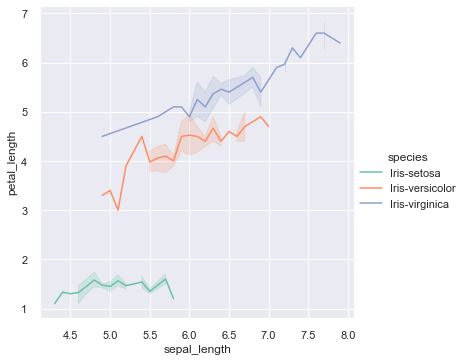

In [9]:
#Item 3.3, comprarando o comprimento da pétala vs o comprimento da sépala
sns.relplot(x="sepal_length", y="petal_length", hue = "species",  data=df, kind ='line',  palette = 'Set2')


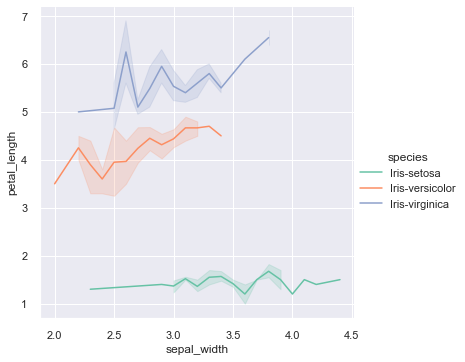

In [10]:
#Item 3.3, comprarando o comprimento da pétala vs alargura da sépala
sns.relplot(x="sepal_width", y="petal_length", hue = "species",  data=df, kind ='line',  palette = 'Set2')


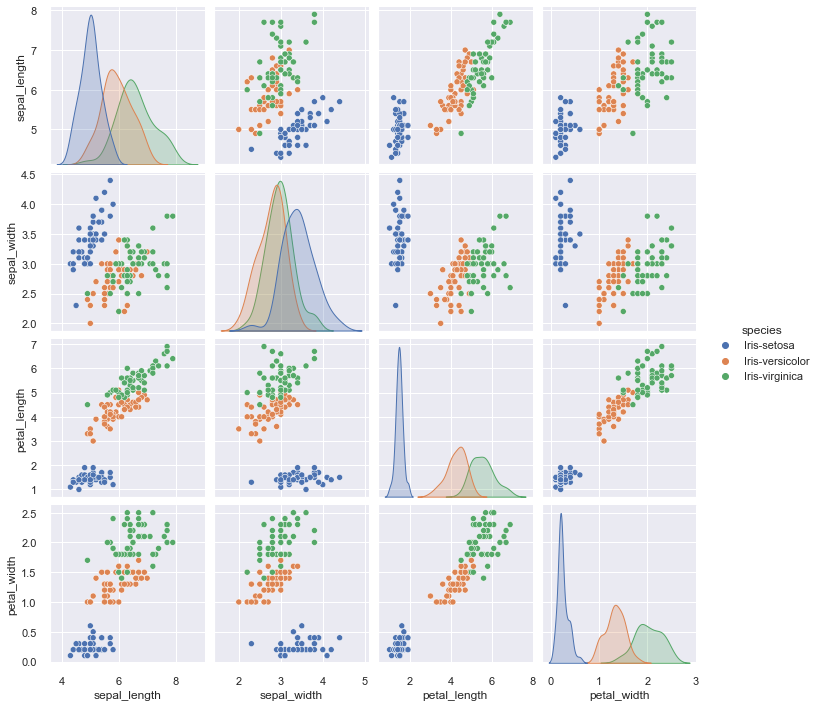

In [11]:
#Item 3.3, Cruzamento de todos os dados apra uma visão geral
sns.pairplot(data = df,hue ='species',)

In [12]:
#Item 4. montando um modelo de classificação, que preveja o a especie de Iris a partir do comprimento e largura da petala e da sépala.
#seaprando a classe dos previsores
#variaveis dependentes
previsores = df.iloc[:,0:4].values

#variaveis independentes
classes = df.iloc[:,4].values

In [13]:
#Item 4.
#divisão entre treino e teste, tamanho para teste 40%

x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, classes, test_size = 0.4,random_state = 0)


In [14]:
#Item 4.
#criando treino do modelo

naive_bayes =GaussianNB()

naive_bayes.fit(x_treino, y_treino)


GaussianNB()

In [15]:
#Item 4.
#criando os previsores com os dados do teste
previsores= naive_bayes.predict(x_teste)
previsores

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolo

In [16]:
#Item 4.1
#matriz de consusão com os dados de teste
conf = confusion_matrix(y_teste, previsores)
conf


array([[16,  0,  0],
       [ 0, 23,  0],
       [ 0,  4, 17]], dtype=int64)

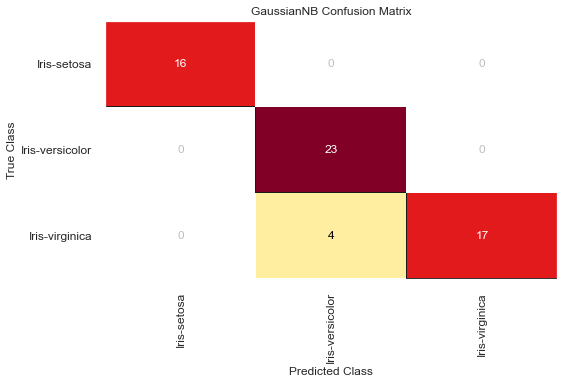

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [17]:
#Item 4.1 visualizando a matriz de confussão com o YellowBrick
v = ConfusionMatrix(GaussianNB())
v.fit(x_treino, y_treino)
v.score(x_teste, y_teste)
v.poof()

In [18]:
taxa_acerto = accuracy_score(y_teste, previsores)
taxa_acerto

0.9333333333333333